In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import KFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
%matplotlib inline

In [2]:
def load_datasets():
    data = pd.read_csv("/users/Sushanta/Documents/GitHub/Illinois/CS598 Practical Statistical Learning/Coding2_myData.csv")
    X = data[data.columns[:-1]]
    y = data['Y']
    
    return X,y

In [3]:
def MyLasso(X, y, lam_seq, maxit = 500):
    
    # X: n-by-p design matrix without the intercept 
    # y: n-by-1 response vector 
    # lam_seq: sequence of lambda values 
    # maxit: number of updates for each lambda 
 
    # Center/Scale X
    # Center y
  
    n, p = X.shape
    nlam = len(lam_seq)
    
    scale_X = StandardScaler().fit(X)
    Xs = scale_X.transform(X)
    scale_y = StandardScaler().fit(np.array(y).reshape(-1,1))
    norm_y = scale_y.transform(np.array(y).reshape(-1,1))
    y = norm_y
    print ("Scale Value of X: {}".format(scale_X.scale_))
    print ("Scale Value of y: {}".format(scale_y.scale_))
    ##############################
    # YOUR CODE: 
    # Record the corresponding means and scales
    # For example, 
    # y_mean = mean of y
    # Xs = centered and scaled X
    ##############################
    

    # Initilize coef vector b and residual vector r
    b = np.zeros(p)
    r = y
    B = np.zeros((nlam, p + 1))
    
    # Triple nested loop
    for m in range(nlam):
        lam = 2 * n * lam_seq[m]
        lam = lam_seq[m]
        for step in range(maxit):
            for j in range(p):
                Xs_j = Xs[:, j].reshape(-1,1)
                r = r + Xs_j * b[j]
                b[j] = one_var_lasso(r, Xs_j, lam)
                r = r - Xs_j * b[j]
        B[m, 1:] = b 
    
    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[, 1]
    ##############################
    
    
    return(B.T)

In [4]:
def one_var_lasso(r, x, lam):
    # the code is written with r, x being n-by-1 vectors
    xx = x.T @ x
    xr = x.T @ r
    b = (abs(xr) - lam/2)/xx
    if b < 0:
        b = 0
    b = np.sign(xr) * b
    return(b)

In [26]:
X, y = load_datasets()
var_names = X.columns

In [6]:
log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

Scale Value of X: [2.1599128  2.32993957 0.77621918 0.25374293 0.20128372 0.11221396
 3.56302006 0.53901312 0.8739684  0.39597467 1.36266243 0.91204607
 0.98619131]
Scale Value of y: [0.40835274]


In [22]:
log_lam_seq

array([-1.        , -1.08860759, -1.17721519, -1.26582278, -1.35443038,
       -1.44303797, -1.53164557, -1.62025316, -1.70886076, -1.79746835,
       -1.88607595, -1.97468354, -2.06329114, -2.15189873, -2.24050633,
       -2.32911392, -2.41772152, -2.50632911, -2.59493671, -2.6835443 ,
       -2.7721519 , -2.86075949, -2.94936709, -3.03797468, -3.12658228,
       -3.21518987, -3.30379747, -3.39240506, -3.48101266, -3.56962025,
       -3.65822785, -3.74683544, -3.83544304, -3.92405063, -4.01265823,
       -4.10126582, -4.18987342, -4.27848101, -4.36708861, -4.4556962 ,
       -4.5443038 , -4.63291139, -4.72151899, -4.81012658, -4.89873418,
       -4.98734177, -5.07594937, -5.16455696, -5.25316456, -5.34177215,
       -5.43037975, -5.51898734, -5.60759494, -5.69620253, -5.78481013,
       -5.87341772, -5.96202532, -6.05063291, -6.13924051, -6.2278481 ,
       -6.3164557 , -6.40506329, -6.49367089, -6.58227848, -6.67088608,
       -6.75949367, -6.84810127, -6.93670886, -7.02531646, -7.11

In [35]:
myout[3,:]

array([-0.02406064, -0.0240694 , -0.02407697, -0.0240839 , -0.02409024,
       -0.02409604, -0.02410135, -0.02410621, -0.02411066, -0.02411473,
       -0.02411845, -0.02412186, -0.02412498, -0.02412784, -0.02413045,
       -0.02413284, -0.02413503, -0.02413704, -0.02413887, -0.02414055,
       -0.02414208, -0.02414349, -0.02414478, -0.02414595, -0.02414703,
       -0.02414802, -0.02414892, -0.02414975, -0.0241505 , -0.02415119,
       -0.02415183, -0.02415241, -0.02415294, -0.02415342, -0.02415387,
       -0.02415427, -0.02415464, -0.02415499, -0.0241553 , -0.02415558,
       -0.02415584, -0.02415608, -0.0241563 , -0.0241565 , -0.02415668,
       -0.02415685, -0.024157  , -0.02415715, -0.02415727, -0.02415739,
       -0.0241575 , -0.0241576 , -0.02415769, -0.02415777, -0.02415785,
       -0.02415791, -0.02415798, -0.02415804, -0.02415809, -0.02415814,
       -0.02415818, -0.02415822, -0.02415826, -0.02415829, -0.02415832,
       -0.02415835, -0.02415838, -0.0241584 , -0.02415842, -0.02

(-8.35, -0.6499999999999999, -0.6732542356438244, 0.18533263916902476)

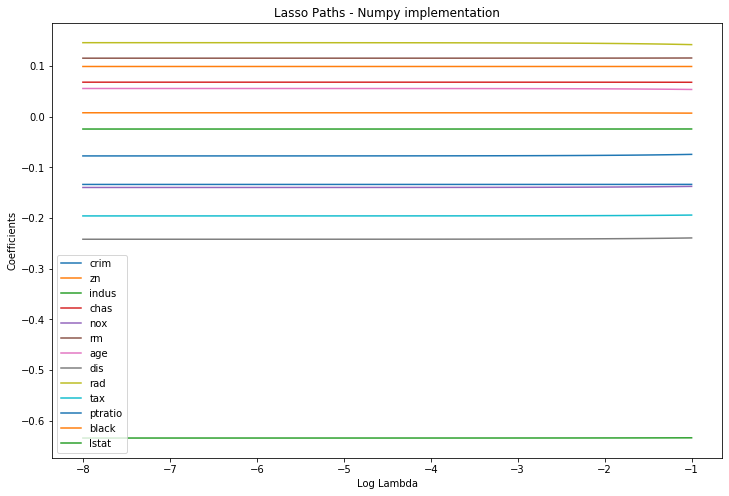

In [29]:
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

In [141]:
scale_X = StandardScaler().fit(X)
Xs = scale_X.transform(X)
scale_y = StandardScaler().fit(np.array(y).reshape(-1,1))
norm_y = scale_y.transform(np.array(y).reshape(-1,1))

In [142]:
final_data = np.true_divide(myout[1:,:],scale_X.scale_.reshape(-1,1))

In [54]:
myout_final = myout[1:,:]/scale_X.scale_.reshape(-1,1)*scale_y.scale_[0]

In [63]:
from sklearn.linear_model import Lasso

In [ ]:
np.true_divide(myout[1:,:])